In [85]:
import pandas as pd
import numpy as np

dados = [5.38, 5.69, 7.32, 7.79, 8.45, 8.96, 11.59, 11.81,
    12.42, 12.61, 13.20, 13.39, 13.70, 14.71, 15.27, 16.50,
    16.67, 17.21, 18.35, 19.19, 19.21, 20.18, 20.47, 20.68,
    21.00, 22.23, 23.11, 23.23, 23.98, 24.04, 24.33, 36.53]

df = pd.DataFrame(dados, columns=['Valores'])

print(df.head())


   Valores
0     5.38
1     5.69
2     7.32
3     7.79
4     8.45


In [86]:
media = df['Valores'].mean()

mediana = df['Valores'].median()

variancia = df['Valores'].var()

desvio_padrão = df['Valores'].std()

min = df['Valores'].min()

max = df['Valores'].max()

quartis = df['Valores'].quantile([0.25,0.5,0.75])

print(f"Media = {media:.2f} minutos")
print(f"Mediana = {mediana:.2f} minutos")
print(f"Variancia = {variancia:.2f} minutos\u00B2")
print(f"Desvio Padrão = {desvio_padrão:.2f} minutos")
print(f"Min = {min:.2f} minutos")
print(f"Max = {max:.2f} minutos")
print(f"Quartis = {quartis}")


Media = 16.54 minutos
Mediana = 16.59 minutos
Variancia = 45.68 minutos²
Desvio Padrão = 6.76 minutos
Min = 5.38 minutos
Max = 36.53 minutos
Quartis = 0.25    12.2675
0.50    16.5850
0.75    20.7600
Name: Valores, dtype: float64


c:\Users\Pedro\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


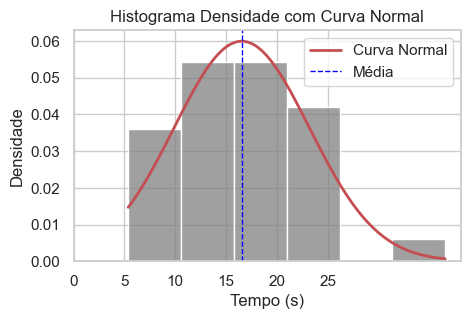

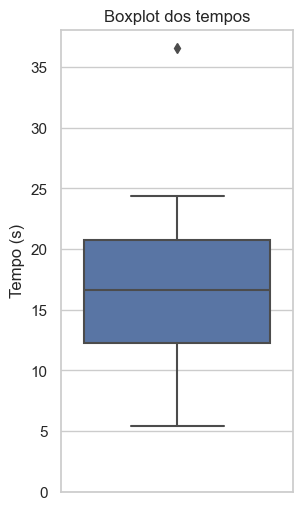

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

media, desvio_padrao = norm.fit(df['Valores'])

# Gerar valores x para a curva normal
x = np.linspace(df['Valores'].min(), df['Valores'].max(), 100)
y = norm.pdf(x, media, desvio_padrao)
# Configurando estilo de exibição do Seaborn
sns.set(style="whitegrid")

# Histograma com linha de densidade e linha vertical para a média
plt.figure(figsize=(5, 3))
sns.histplot(df['Valores'], kde=False, color='gray', stat='density')
plt.plot(x, y, 'r-', lw=2, label='Curva Normal')
plt.axvline(media, color='blue', linestyle='dashed', linewidth=1, label='Média')
plt.title('Histograma Densidade com Curva Normal')
plt.xlabel('Tempo (s)')
plt.ylabel('Densidade')
plt.xticks(np.arange(0, 30, 5))
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(3, 6))
sns.boxplot(y=df['Valores'])
plt.title('Boxplot dos tempos')
plt.ylabel('Tempo (s)')
plt.yticks(np.arange(0, 40, 5))
plt.show()

In [88]:
import scipy.stats as stats


dados_np = np.array(dados)

media_np = np.mean(dados_np)

dp_np = np.std(dados_np, ddof=1)

n = len(dados_np)

conf = 0.95
df = n - 1

print(f"Media pontual: {media:.2f} minutos")
print(f"Variância pontual: {variancia:.2f} minutos\u00B2")
print(f"Desvio Padrão Pontual: {desvio_padrão:.2f} minutos")
print()

#Considerando que a curva pode ser vista como uma distribuição normal
intervalo_t = stats.t.interval(conf, df, loc=media_np, scale=dp_np/np.sqrt(n))
print(f"Intervalo de confiança para a média ({conf*100}%): ({intervalo_t[0]:.2f}, {intervalo_t[1]:.2f}) minutos")

variancia = np.var(dados_np, ddof=1)


chi2_lower = stats.chi2.ppf((1 - conf) / 2, df)
chi2_upper = stats.chi2.ppf((1 + conf) / 2, df)

intervalo_variancia = (df * variancia / chi2_upper, df * variancia / chi2_lower)
print(f"Intervalo de confiança para a variância ({conf*100}%): ({intervalo_variancia[0]:.2f}, {intervalo_variancia[1]:.2f}) minutos\u00B2")

intervalo_dp = (np.sqrt(intervalo_variancia[0]), np.sqrt(intervalo_variancia[1]))
print(f"Intervalo de confiança para o desvio padrão ({conf*100}%): ({intervalo_dp[0]:.2f}, {intervalo_dp[1]:.2f}) minutos")

Media pontual: 16.54 minutos
Variância pontual: 45.68 minutos²
Desvio Padrão Pontual: 6.76 minutos

Intervalo de confiança para a média (95.0%): (14.10, 18.97) minutos
Intervalo de confiança para a variância (95.0%): (29.36, 80.73) minutos²
Intervalo de confiança para o desvio padrão (95.0%): (5.42, 8.99) minutos


In [89]:
import numpy as np
import pandas as pd
from scipy import stats

# Valor da hipótese nula (tempo médio de 20 minutos)
h_0 = 20
nivel_conf = 0.05
# Calculando a estatística teste
t_stat = (media - h_0) / (desvio_padrão / np.sqrt(n))

# Calculando o valor crítico t para um teste unilateral com alfa = 0.05, teste lateral a esquerda 
t_critical= stats.t.ppf(nivel_conf, df=n-1)

# Calculando o p-valor
p_valor = stats.t.cdf(t_stat, df=n-1)

print(f"O valor da estatistica de teste é: {t_stat:.3f}")
print(f"O valor de t para rejeição é < {t_critical:.3f}")
print(f"O p valor é: {p_valor:.5f}")
print()
print(f"Como t_obs {t_stat:.3} < {t_critical:.3} temos evidências para rejeitar h_o")
print(f"Em paralelo sabemos que o p valor: {p_valor:.5} é menor que o nivel de confiança : {nivel_conf} logo podemos rejeitar h_o")
print()
print("Como h_0 pode ser rejeitado existem evidências de que a média de entrega é menor que 20 minutos")



O valor da estatistica de teste é: -2.898
O valor de t para rejeição é < -1.696
O p valor é: 0.00342

Como t_obs -2.9 < -1.7 temos evidências para rejeitar h_o
Em paralelo sabemos que o p valor: 0.003417 é menor que o nivel de confiança : 0.05 logo podemos rejeitar h_o

Como h_0 pode ser rejeitado existem evidências de que a média de entrega é menor que 20 minutos
